# Time Series Forescasting

In [1]:
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt

In [15]:
train = pd.read_csv('train.csv')

In [16]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [23]:
def parser(x):
    return datetime.strptime(x,'%Y-%m')

#sales = pd.read_csv('train.csv',index_col=0, parse_dates=[0] ,date_parser=parser)

In [8]:
sales = pd.read_csv('train.csv',index_col=0, parse_dates=[0])

In [9]:
sales.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [19]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [18]:
train['datetime'] = pd.to_datetime(train.datetime)

In [24]:
train_data = train[['datetime','count']]

In [25]:
train_data.head()

,datetime,count
0,2011-01-01 00:00:00,16
1,2011-01-01 01:00:00,40
2,2011-01-01 02:00:00,32
3,2011-01-01 03:00:00,13
4,2011-01-01 04:00:00,1


In [47]:
train_data['datetime'] = pd.to_datetime(train_data['datetime']).dt.date

c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [48]:
train_data.head()

,datetime,count
0,2011-01-01,16
1,2011-01-01,40
2,2011-01-01,32
3,2011-01-01,13
4,2011-01-01,1


In [49]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 2 columns):
datetime    10886 non-null datetime64[ns]
count       10886 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 170.2 KB


In [50]:
train_data.to_csv('modifed_bikes.csv',index = False,header = True)

In [34]:
te = pd.read_csv('modifed_bikes.csv')
te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 2 columns):
datetime    10886 non-null object
count       10886 non-null int64
dtypes: int64(1), object(1)
memory usage: 170.2+ KB


In [31]:
def parser(x):
    return datetime.strptime(x,'%Y-%m')

modifed_dat_yime = pd.read_csv('modifed_bikes.csv',index_col=0, parse_dates=[0] ,date_parser=parser)

ValueError: unconverted data remains: -01 00:00:00

In [27]:
#train_data.plot()

Stationary means mean, variance and covariance is constant over periods.

TypeError: float() argument must be a string or a number, not 'Timestamp'

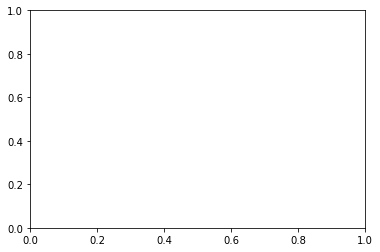

In [51]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(train_data)

### Converting series to stationary

In [53]:
train_data.head()

,datetime,count
0,2011-01-01,16
1,2011-01-01,40
2,2011-01-01,32
3,2011-01-01,13
4,2011-01-01,1


In [54]:
train_data.shift(1)

,datetime,count
0,NaT,NaN
1,2011-01-01,16.0
2,2011-01-01,40.0
3,2011-01-01,32.0
4,2011-01-01,13.0
...,...,...
10881,2012-12-19,569.0
10882,2012-12-19,336.0
10883,2012-12-19,241.0
10884,2012-12-19,168.0


In [55]:
sales_diff = train_data.diff(periods=1)
# integrated of order 1, denoted by d (for diff), one of the parameter of ARIMA model

In [56]:
sales_diff = sales_diff[1:]
sales_diff.head()

,datetime,count
1,0 days,24.0
2,0 days,-8.0
3,0 days,-19.0
4,0 days,-12.0
5,0 days,0.0


TypeError: float() argument must be a string or a number, not 'Timedelta'

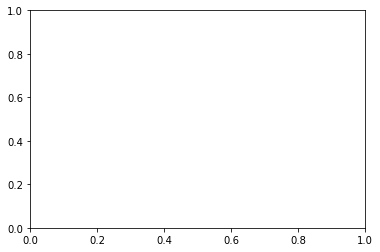

In [57]:
plot_acf(sales_diff)

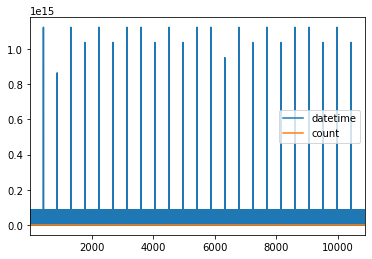

In [58]:
sales_diff.plot()

In [59]:
X = train_data.values
train = X[0:27] # 27 data as train data
test = X[26:]  # 9 data as test data
predictions = []

In [60]:
train.size

54

# Autoreggresive AR Model

In [63]:
test

array([[Timestamp('2011-01-02 00:00:00'), 9],
       [Timestamp('2011-01-02 00:00:00'), 6],
       [Timestamp('2011-01-02 00:00:00'), 3],
       ...,
       [Timestamp('2012-12-19 00:00:00'), 168],
       [Timestamp('2012-12-19 00:00:00'), 129],
       [Timestamp('2012-12-19 00:00:00'), 88]], dtype=object)

In [61]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar = AR(train)
model_ar_fit = model_ar.fit()

c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPREC

ValueError: Only the univariate case is implemented

In [50]:
predictions = model_ar_fit.predict(start=26,end=36)

In [51]:
test

array([[439],
       [401],
       [390],
       [490],
       [408],
       [490],
       [420],
       [520],
       [480]])

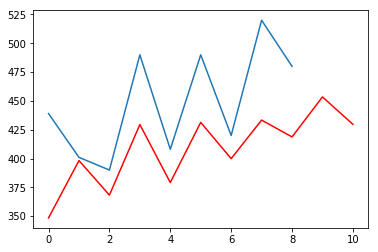

In [52]:
plt.plot(test)
plt.plot(predictions,color='red')

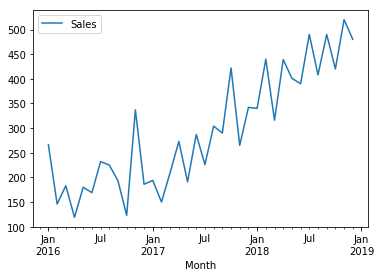

In [49]:
sales.plot()

# ARIMA model

In [53]:
from statsmodels.tsa.arima_model import ARIMA

In [102]:
#p,d,q  p = periods taken for autoregressive model
#d -> Integrated order, difference
# q periods in moving average model
model_arima = ARIMA(train,order=(9, 2, 0))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

297.16198439013385


In [103]:
predictions= model_arima_fit.forecast(steps=10)[0]
predictions

array([ 396.0476597 ,  355.93672295,  413.1053552 ,  374.50417114,
        446.93961792,  378.6152457 ,  406.38595548,  411.37779577,
        475.88812611,  415.38360893])

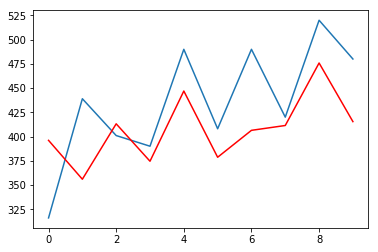

In [104]:
plt.plot(test)
plt.plot(predictions,color='red')

In [97]:
mean_squared_error(test,predictions)

3338.7840488177876

In [82]:
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [86]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue
    

(0, 0, 0) 319.452858523
(0, 0, 1) 318.72448093855843
(0, 0, 2) 315.25060028819166
(0, 0, 3) nan
(0, 0, 4) 310.1669328586838
(0, 1, 0) 311.829398349
(0, 1, 1) 296.0841523580429
(0, 1, 2) 296.3229226907717
(0, 2, 0) 329.183495825
(0, 2, 1) 306.1019479844314
(1, 0, 0) 316.1668717523843
(1, 0, 1) 313.04871744128553
(1, 0, 2) 310.9790642227309
(1, 0, 4) 309.6779931143489
(1, 1, 0) 298.8325442271006
(1, 1, 1) 297.125651125858
(1, 1, 2) 299.47166670629974
(1, 1, 3) 301.28511809508103
(1, 1, 4) 299.9787323970439
(1, 2, 0) 306.53077675712257
(1, 2, 3) 290.3253394337328
(2, 0, 0) 310.996957361246
(2, 0, 4) nan
(2, 1, 0) 300.2089561240259
(2, 1, 1) 297.9999930167356
(2, 1, 2) 298.550542813022
(2, 1, 3) 302.8720832242939
(2, 2, 0) 306.2975856432374
(2, 2, 3) nan
(3, 0, 0) 312.9838587419075
(3, 0, 4) nan
(3, 1, 0) 294.8543584218629
(3, 1, 1) 295.9979353418878
(3, 1, 2) 292.6686238694057
(3, 1, 3) 294.65889075168667
(3, 2, 0) 299.40758681562386
(3, 2, 4) nan
(4, 0, 0) 311.0706562026968
(4, 0, 1) 321